## Transformation by Reciprocal Model
---

<div class="alert alert-block alert-info">
<b>Step 1:</b> IMPORT LIBRARY
</div>

In [1]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 41.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

<div class="alert alert-block alert-info">
<b>Step 2:</b> PROVIDE DATA
</div>

In [3]:
df = pd.read_csv('housing.csv')  
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


##### Data Description
This data is derived from information collected by the US Census Service on housing in the Boston area.
>**RM** :The average number of rooms among homes in the neighborhood

>**LSTAT** : The percentage of homeowners in the neighborhood considered "lower class" (working poor).

>**PTRATION** : The ratio of students to teachers in primary and secondary schools in the neighborhood.

>**MEDV** : The Median value of owner-occupied homes in $1000's

<div class="alert alert-block alert-info">
<b>Step 3:</b> DATA CORRELATION
</div>

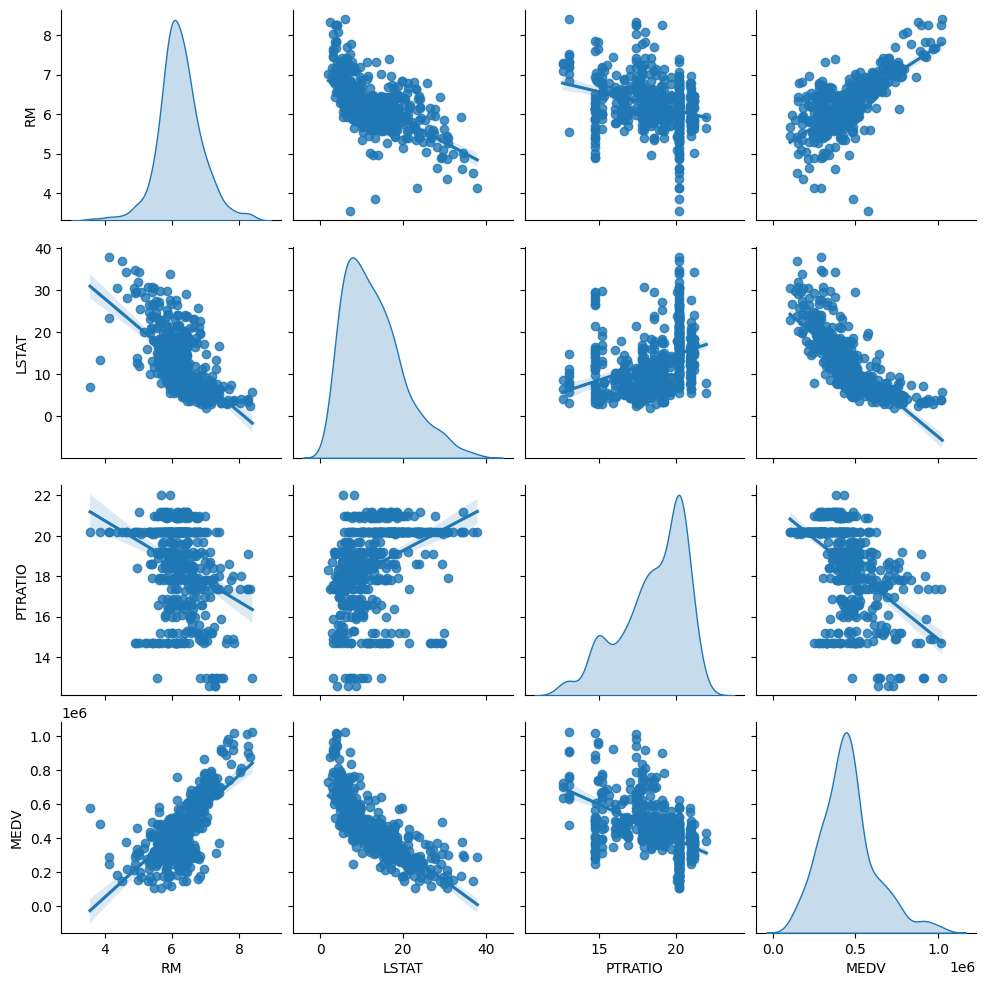

In [4]:
sns.pairplot(df,kind='reg',diag_kind='kde')
plt.show()

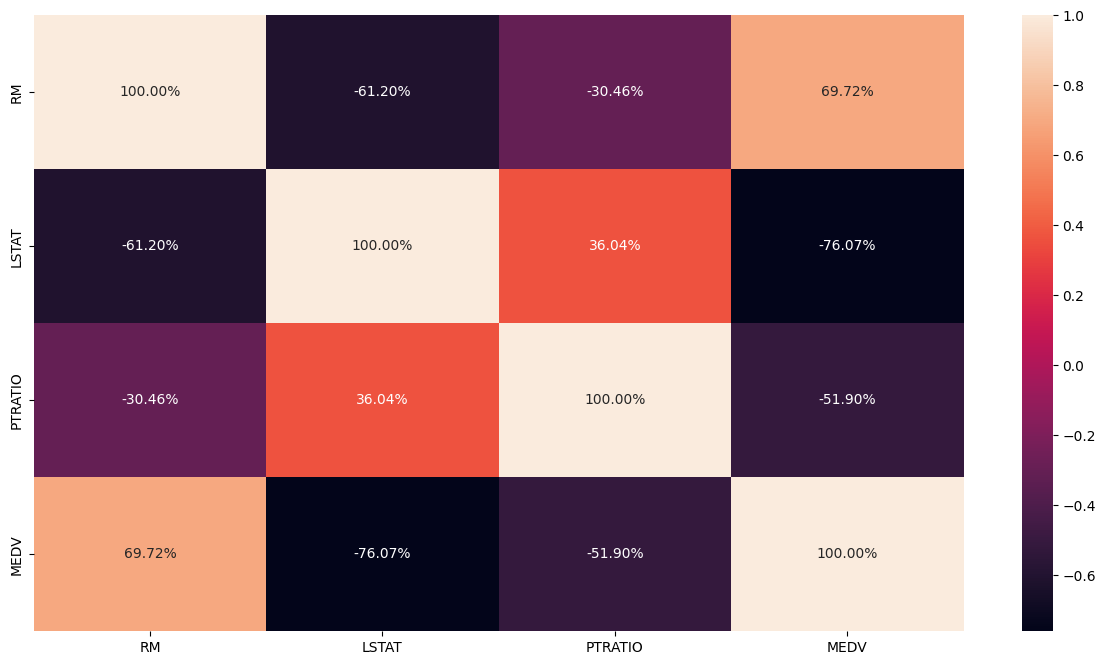

In [5]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.show()

Based on the heatmap above, the variables that have very little correlation are LSTAT and MEDV. Similarly, we can also see from the plot above that the data is not linear and shows a reciprocal model. So we take the variable LSTAT with MEDV to analyze further with a correlation of **`-76.07%`**. With **MEDV as the dependent variable (y)** and **LSTAT as the independent variable (X)**

In [6]:
LRData=df[['LSTAT', 'MEDV']]

<div class="alert alert-block alert-info">
<b>Step 4:</b> SIMPLE LINEAR REGRESSION
</div>

In [7]:
LR = LinearRegression ()
X = LRData[['LSTAT']]
y = LRData[['MEDV']]
model = LR.fit(X, y)  #create model dari LR dari X dan y (berdasarkan data yang dimiliki)
r_sq = model.score(X, y)

##### Estimate &beta;<sub>0</sub> and &beta;<sub>1</sub>

In [8]:
print('Coefficient of determination R^2):', r_sq)
print('intercept:', model.intercept_[0])
print('aslope:', model.coef_[0][0])

Coefficient of determination R^2): 0.5786189401388357
intercept: 684138.4930684497
aslope: -17759.048327370747


<div class="alert alert-block alert-success">
<b>Simple Linear Regression:</b> Y = &beta;<sub>0</sub> + &beta;<sub>1</sub>X

$Y$ = 684138.4930684497 - 17759.048327370747$X$
</div>

##### Data Visualization

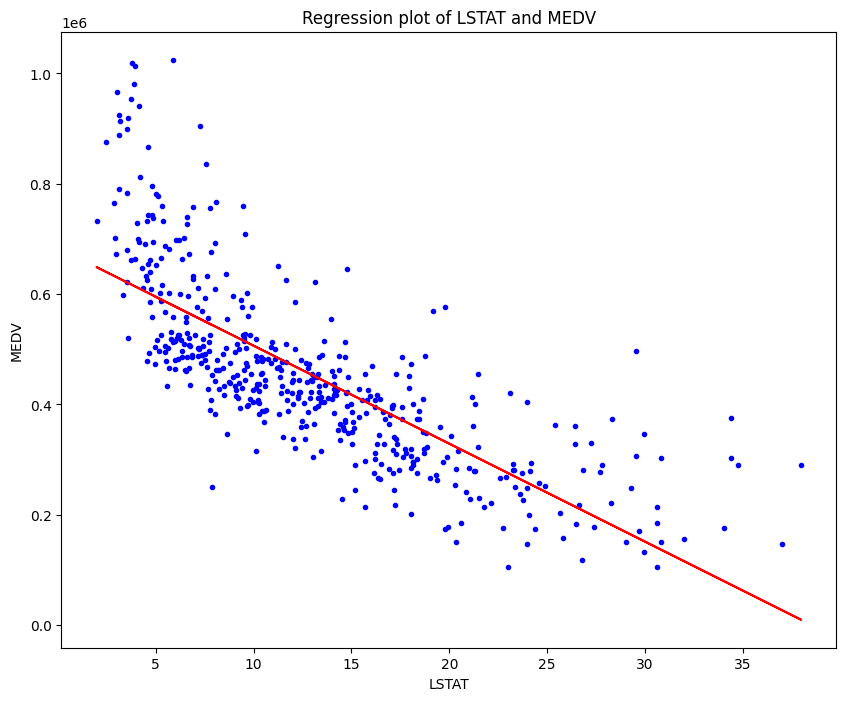

In [9]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(X,y, color="blue", marker=".")
plt.plot(X,LR.predict(X), color="red")
plt.ylabel('MEDV')
plt.xlabel('LSTAT')
plt.title("Regression plot of LSTAT and MEDV")
plt.show()


In the graph above, it is very clear that the data is not linear or nonlinear. However, the graph shows data with a reciprocal model. For that we will try to transform the data and see the changes.

<div class="alert alert-block alert-info">
<b>Step 5:</b> ORDINARY LEAST SQUARE (OLS)
</div>

In [10]:
X = sm.add_constant(LRData["LSTAT"].to_numpy())
y = LRData["MEDV"].to_numpy()
LR = sm.OLS(y, X).fit()
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           1.93e-93
Time:                        06:23:13   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.841e+05   1.01e+04     67.551      0.000    6.64e+05    7.04e+05
x1         -1.776e+04    686.746    -25.860      0.000   -1.91e+04   -1.64e+04
==============================================================================
Omnibus:                      105.652   Durbin-Watson:                   1.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.227
Skew:                           1.217   Prob(JB):                     9.03e-44
Kurtosis:                       4.950   Cond. No.                         30.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS results above, the **R<sup>2</sup>** value obtained is **`0.579`** which means that the independent variables of the model are not good enough to explain the dependent variable.

<div class="alert alert-block alert-info">
<b>Step 6:</b> RECIPROCAL TRANSFORMATION
</div>

In [11]:
LRData1=LRData.copy()
LRData1['Reciprocal LSTAT']=np.reciprocal(LRData['LSTAT'])

In [12]:
LR = LinearRegression ()
X1 = LRData1[['Reciprocal LSTAT']]
y1 = LRData1[['MEDV']]
model1 = LR.fit(X1,y1)
r_sq1 = model1.score(X1, y1)

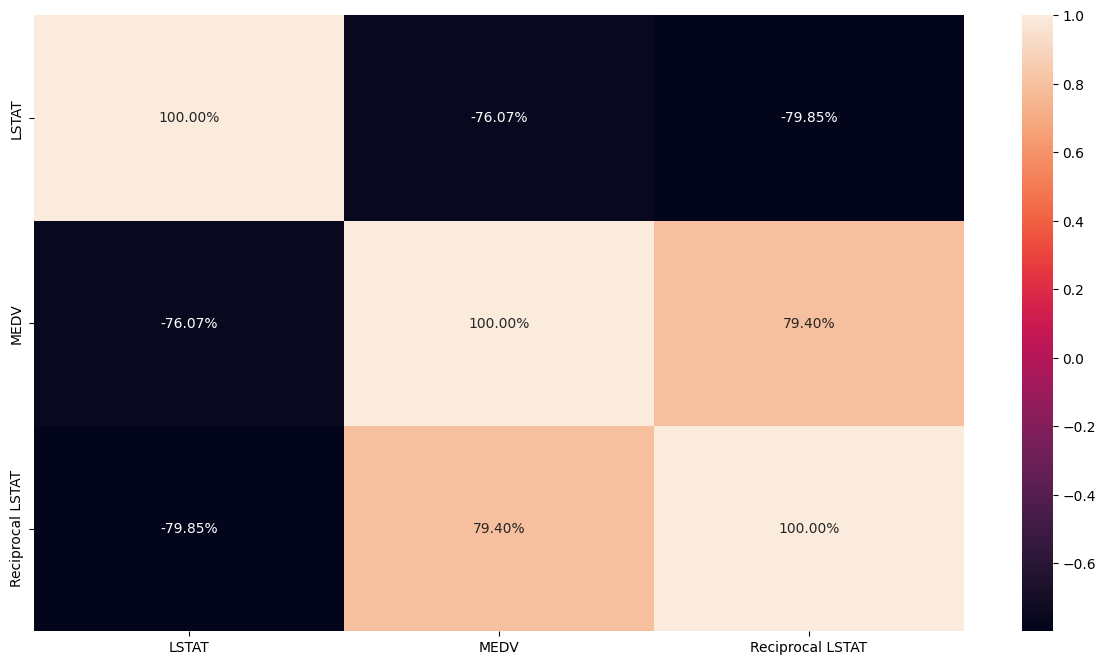

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(LRData1.corr(), annot=True, fmt='.2%')
plt.show()

After transforming with the **Reciprocal Model**, the correlation between the independent (**LSTAT**) and dependent (**MEDV**) variables is higher at **`79.40%`**.

In [14]:
print('Coefficient of determination R^2 After Transformation:', r_sq1)
print('intercept:', model1.intercept_[0])
print('aslope:', model1.coef_[0][0])

Coefficient of determination R^2 After Transformation: 0.6304493154356112
intercept: 248082.43386362976
aslope: 1928026.0305789204


From the OLS results above, the **R<sup>2</sup>** value obtained is higher at **`0.630`**. This means that the transformation has an effect on both variables.

<div class="alert alert-block alert-success">
<b>Simple Linear Regression:</b> Y = &beta;<sub>0</sub> + &beta;<sub>1</sub>(1/X)

$Y$ = 248082.43386362976 + 1928026.0305789204($1/X$)
</div>

##### Data Visualization

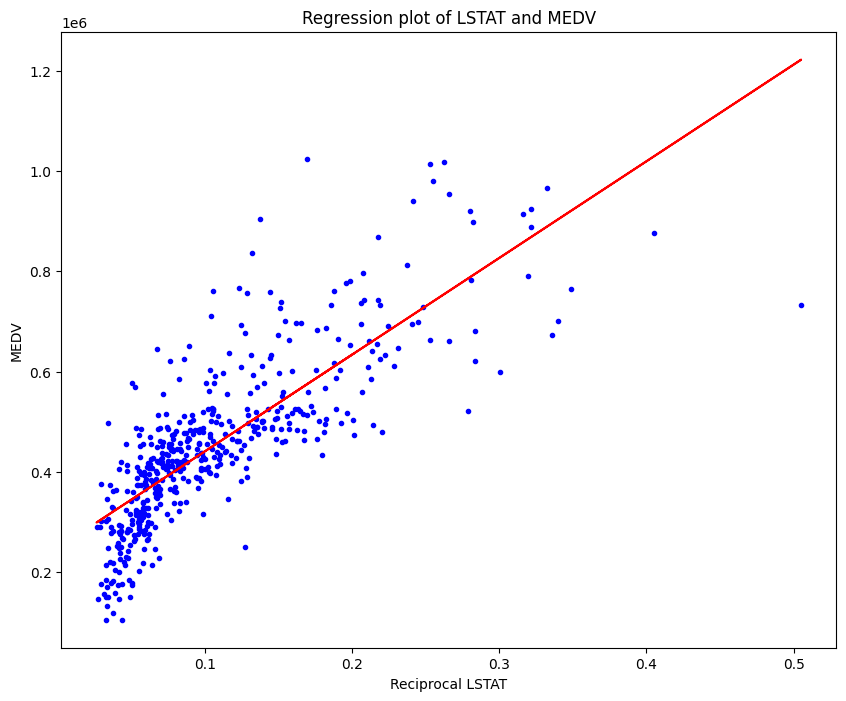

In [15]:
fig, ax = plt.subplots(figsize=(10, 8)) 
plt.scatter(X1,y1, color="blue", marker=".")
plt.plot(X1,LR.predict(X1), color="red")
plt.ylabel('MEDV')
plt.xlabel('Reciprocal LSTAT')
plt.title("Regression plot of LSTAT and MEDV")
plt.show()

Pada grafik diatas datanya sudah mengarah linear. Meskipun grafik tersebut menunjukkan data yang tidak terlalu linear tetapi sudah lebih baik daripada sebelum dilakukan transformasi.

<div class="alert alert-block alert-info">
<b>Step 7:</b> ORDINARY LEAST SQUARE (OLS) AFTER RECIPROCAL
</div>

In [16]:
X1 = sm.add_constant(X1)
 
model = sm.OLS(y1, X1).fit()
predictions = model.predict(X1) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     830.8
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          2.43e-107
Time:                        06:23:14   Log-Likelihood:                -6325.7
No. Observations:                 489   AIC:                         1.266e+04
Df Residuals:                     487   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.481e+05   8479.904  

From the OLS results on the side, the R2 value obtained is **`0.630`** which can explain the dependent variable compared to the previous model. However, it is still not good enough in explaining the dependent variable.

<div class="alert alert-block alert-info">
<b>Conclusion

From the OLS results, the **R<sup>2</sup>** value obstained is  **`0.630`** which means an increase from the previous **R<sup>2</sup>** whch was only **`0.579`**. This transformed model can explain the dependent variable better than the previous model.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8d39ce85-d5c6-49f8-b00c-db9cf890dd62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>